In [395]:
import pandas as pd
import numpy as np

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)
pd.set_option('precision', 7)

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline

### Times series and the DatetimeIndex

In [345]:
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
dti = pd.DatetimeIndex(dates)
dti

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [346]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.4691123
2014-08-02   -0.2828633
dtype: float64

In [347]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [348]:
ts[datetime(2014, 8, 2)]

-0.28286334432866328

In [349]:
ts['2014-08-2']

-0.28286334432866328

In [350]:
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.4691123
2014-08-02   -0.2828633
dtype: float64

In [351]:
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02', '2014.8.3', None])
dti

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [352]:
dti2 = pd.to_datetime(['Aug 1, 2014', 'foo'], errors='coerce')
dti2

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [353]:
dti1 = pd.to_datetime(['8/1/2014'])
dti2 = pd.to_datetime(['1/8/2014'], dayfirst=True)
dti1[0], dti2[0]

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-01 00:00:00'))

In [354]:
pd.to_datetime([dti1[0], dti2[0]])

DatetimeIndex(['2014-08-01', '2014-08-01'], dtype='datetime64[ns]', freq=None)

In [355]:
np.random.seed(123456)
dates = pd.date_range('8/1/2014', periods=10)
s1 = pd.Series(np.random.randn(10), dates)
s1

2014-08-01    0.4691123
2014-08-02   -0.2828633
2014-08-03   -1.5090585
2014-08-04   -1.1356324
2014-08-05    1.2121120
2014-08-06   -0.1732146
2014-08-07    0.1192087
2014-08-08   -1.0442360
2014-08-09   -0.8618490
2014-08-10   -2.1045692
Freq: D, dtype: float64

In [356]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf

yf.pdr_override() # to override pandas_datareader.data.get_data_yahoo() method

In [357]:
msft = web.get_data_yahoo('MSFT', start='2012-1-1', end='2014-1-1')

[*********************100%***********************]  1 of 1 downloaded

In [358]:
msft

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  22.909807  64731500
2012-01-04  26.820000  27.469999  26.780001  27.400000  23.448965  80516100
2012-01-05  27.379999  27.730000  27.290001  27.680000  23.688589  56081400
2012-01-06  27.530001  28.190001  27.530001  28.110001  24.056585  99455500
2012-01-09  28.049999  28.100000  27.719999  27.740000  23.739935  59706800
2012-01-10  27.930000  28.150000  27.750000  27.840000  23.825512  60014400
2012-01-11  27.430000  27.980000  27.370001  27.719999  23.722824  65582400
...               ...        ...        ...        ...        ...       ...
2013-12-20  36.200001  36.930000  36.189999  36.799999  33.364079  62649100
2013-12-23  36.810001  36.889999  36.549999  36.619999  33.200878  25128700
2013-12-24  36.720001  37.169998  36.639999  37.080002  33.617931  14243000
2013-12-26  

In [359]:
msftAC = msft['Adj Close']
msftAC.head()

Date
2012-01-03    22.909807
2012-01-04    23.448965
2012-01-05    23.688589
2012-01-06    24.056585
2012-01-09    23.739935
Name: Adj Close, dtype: float64

In [360]:
msft['2012-01-01':'2012-01-05']

                 Open       High        Low  Close  Adj Close    Volume
Date                                                                   
2012-01-03  26.549999  26.959999  26.389999  26.77  22.909807  64731500
2012-01-04  26.820000  27.469999  26.780001  27.40  23.448965  80516100
2012-01-05  27.379999  27.730000  27.290001  27.68  23.688589  56081400

In [361]:
msft.loc['2012-01-01':'2012-01-05']

                 Open       High        Low  Close  Adj Close    Volume
Date                                                                   
2012-01-03  26.549999  26.959999  26.389999  26.77  22.909807  64731500
2012-01-04  26.820000  27.469999  26.780001  27.40  23.448965  80516100
2012-01-05  27.379999  27.730000  27.290001  27.68  23.688589  56081400

In [362]:
msft.loc['2012-01-03']

Open         2.6549999e+01
High         2.6959999e+01
Low          2.6389999e+01
Close        2.6770000e+01
Adj Close    2.2909807e+01
Volume       6.4731500e+07
Name: 2012-01-03 00:00:00, dtype: float64

In [363]:
msft['2012-01-03':'2012-01-03']

                 Open       High        Low  Close  Adj Close    Volume
Date                                                                   
2012-01-03  26.549999  26.959999  26.389999  26.77  22.909807  64731500

In [364]:
# this doesn't work, it's trying to look for a column with that name
# msft['2012-01-03']

In [365]:
# this does work because it's a Series
msftAC['2012-01-03']

22.909807000000001

In [366]:
msft['2012-01'].head()

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  22.909807  64731500
2012-01-04  26.820000  27.469999  26.780001  27.400000  23.448965  80516100
2012-01-05  27.379999  27.730000  27.290001  27.680000  23.688589  56081400
2012-01-06  27.530001  28.190001  27.530001  28.110001  24.056585  99455500
2012-01-09  28.049999  28.100000  27.719999  27.740000  23.739935  59706800

### Creating time-series with specific frequencies

In [367]:
bymin = pd.Series(np.arange(0, 90*60*24),
                  pd.date_range('2014-08-01',
                                '2014-10-29 23:59:00', 
                                 freq='T'))
bymin

2014-08-01 00:00:00         0
2014-08-01 00:01:00         1
2014-08-01 00:02:00         2
2014-08-01 00:03:00         3
2014-08-01 00:04:00         4
2014-08-01 00:05:00         5
2014-08-01 00:06:00         6
                        ...  
2014-10-29 23:53:00    129593
2014-10-29 23:54:00    129594
2014-10-29 23:55:00    129595
2014-10-29 23:56:00    129596
2014-10-29 23:57:00    129597
2014-10-29 23:58:00    129598
2014-10-29 23:59:00    129599
Freq: T, dtype: int32

In [368]:
bymin['2014-08-01 12:30':'2014-08-01 12:59']

2014-08-01 12:30:00    750
2014-08-01 12:31:00    751
2014-08-01 12:32:00    752
2014-08-01 12:33:00    753
2014-08-01 12:34:00    754
2014-08-01 12:35:00    755
2014-08-01 12:36:00    756
                      ... 
2014-08-01 12:53:00    773
2014-08-01 12:54:00    774
2014-08-01 12:55:00    775
2014-08-01 12:56:00    776
2014-08-01 12:57:00    777
2014-08-01 12:58:00    778
2014-08-01 12:59:00    779
Freq: T, dtype: int32

### Representing intervals of time using periods

In [369]:
aug2014 = pd.Period('2014-8', freq='M')
aug2014

Period('2014-08', 'M')

In [370]:
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [371]:
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [372]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

In [373]:
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [374]:
['{}, {}, {}, {}'.format(p, p.freq, p.start_time, p.end_time) for p in mp2013]

['2013-01, <MonthEnd>, 2013-01-01 00:00:00, 2013-01-31 23:59:59.999999999',
 '2013-02, <MonthEnd>, 2013-02-01 00:00:00, 2013-02-28 23:59:59.999999999',
 '2013-03, <MonthEnd>, 2013-03-01 00:00:00, 2013-03-31 23:59:59.999999999',
 '2013-04, <MonthEnd>, 2013-04-01 00:00:00, 2013-04-30 23:59:59.999999999',
 '2013-05, <MonthEnd>, 2013-05-01 00:00:00, 2013-05-31 23:59:59.999999999',
 '2013-06, <MonthEnd>, 2013-06-01 00:00:00, 2013-06-30 23:59:59.999999999',
 '2013-07, <MonthEnd>, 2013-07-01 00:00:00, 2013-07-31 23:59:59.999999999',
 '2013-08, <MonthEnd>, 2013-08-01 00:00:00, 2013-08-31 23:59:59.999999999',
 '2013-09, <MonthEnd>, 2013-09-01 00:00:00, 2013-09-30 23:59:59.999999999',
 '2013-10, <MonthEnd>, 2013-10-01 00:00:00, 2013-10-31 23:59:59.999999999',
 '2013-11, <MonthEnd>, 2013-11-01 00:00:00, 2013-11-30 23:59:59.999999999',
 '2013-12, <MonthEnd>, 2013-12-01 00:00:00, 2013-12-31 23:59:59.999999999']

In [375]:
for p in mp2013:
    print("{0} {1} {2} {3}".format(p, p.freq, p.start_time, p.end_time))

2013-01 <MonthEnd> 2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02 <MonthEnd> 2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03 <MonthEnd> 2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04 <MonthEnd> 2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05 <MonthEnd> 2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06 <MonthEnd> 2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07 <MonthEnd> 2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08 <MonthEnd> 2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09 <MonthEnd> 2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10 <MonthEnd> 2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11 <MonthEnd> 2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12 <MonthEnd> 2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [376]:
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01    0.4691123
2013-02   -0.2828633
2013-03   -1.5090585
2013-04   -1.1356324
2013-05    1.2121120
2013-06   -0.1732146
2013-07    0.1192087
2013-08   -1.0442360
2013-09   -0.8618490
2013-10   -2.1045692
2013-11   -0.4949293
2013-12    1.0718038
Freq: M, dtype: float64

### Shifting and lagging time-series data

In [377]:
msftAC.head()

Date
2012-01-03    22.909807
2012-01-04    23.448965
2012-01-05    23.688589
2012-01-06    24.056585
2012-01-09    23.739935
Name: Adj Close, dtype: float64

In [378]:
shifted_forward = msftAC.shift()
shifted_forward.head()

Date
2012-01-03          NaN
2012-01-04    22.909807
2012-01-05    23.448965
2012-01-06    23.688589
2012-01-09    24.056585
Name: Adj Close, dtype: float64

In [379]:
# shift by frequencies
msftAC.shift(1, freq='S')

Date
2012-01-03 00:00:01    22.909807
2012-01-04 00:00:01    23.448965
2012-01-05 00:00:01    23.688589
2012-01-06 00:00:01    24.056585
2012-01-09 00:00:01    23.739935
2012-01-10 00:00:01    23.825512
2012-01-11 00:00:01    23.722824
                         ...    
2013-12-20 00:00:01    33.364079
2013-12-23 00:00:01    33.200878
2013-12-24 00:00:01    33.617931
2013-12-26 00:00:01    33.944324
2013-12-27 00:00:01    33.808323
2013-12-30 00:00:01    33.808323
2013-12-31 00:00:01    33.917126
Name: Adj Close, dtype: float64

In [380]:
msftAC.tshift(1, freq='d').head()

Date
2012-01-04    22.909807
2012-01-05    23.448965
2012-01-06    23.688589
2012-01-07    24.056585
2012-01-10    23.739935
Name: Adj Close, dtype: float64

### Frequency conversion of time-series data

In [381]:
sample = msftAC[:2]
sample

Date
2012-01-03    22.909807
2012-01-04    23.448965
Name: Adj Close, dtype: float64

In [382]:
sample.asfreq('H')

Date
2012-01-03 00:00:00    22.909807
2012-01-03 01:00:00          NaN
2012-01-03 02:00:00          NaN
2012-01-03 03:00:00          NaN
2012-01-03 04:00:00          NaN
2012-01-03 05:00:00          NaN
2012-01-03 06:00:00          NaN
                         ...    
2012-01-03 18:00:00          NaN
2012-01-03 19:00:00          NaN
2012-01-03 20:00:00          NaN
2012-01-03 21:00:00          NaN
2012-01-03 22:00:00          NaN
2012-01-03 23:00:00          NaN
2012-01-04 00:00:00    23.448965
Freq: H, Name: Adj Close, dtype: float64

In [383]:
sample.asfreq('H', method='ffill')

Date
2012-01-03 00:00:00    22.909807
2012-01-03 01:00:00    22.909807
2012-01-03 02:00:00    22.909807
2012-01-03 03:00:00    22.909807
2012-01-03 04:00:00    22.909807
2012-01-03 05:00:00    22.909807
2012-01-03 06:00:00    22.909807
                         ...    
2012-01-03 18:00:00    22.909807
2012-01-03 19:00:00    22.909807
2012-01-03 20:00:00    22.909807
2012-01-03 21:00:00    22.909807
2012-01-03 22:00:00    22.909807
2012-01-03 23:00:00    22.909807
2012-01-04 00:00:00    23.448965
Freq: H, Name: Adj Close, dtype: float64

### Resampling of time-series

In [397]:
msft_cum_ret = (1 + msftAC.pct_change()).cumprod().fillna(1)
msft_cum_ret.head(30)

Date
2012-01-03    1.0000000
2012-01-04    1.0235339
2012-01-05    1.0339934
2012-01-06    1.0500562
2012-01-09    1.0362346
2012-01-10    1.0399700
2012-01-11    1.0354877
2012-01-12    1.0459471
2012-01-13    1.0552859
2012-01-17    1.0556594
2012-01-18    1.0545387
2012-01-19    1.0504296
2012-01-20    1.1098245
2012-01-23    1.1105717
2012-01-24    1.0960032
2012-01-25    1.1042212
2012-01-26    1.1019797
2012-01-27    1.0918939
2012-01-30    1.1060890
2012-01-31    1.1031006
2012-02-01    1.1165485
2012-02-02    1.1187897
2012-02-03    1.1296228
2012-02-06    1.1281284
2012-02-07    1.1337319
2012-02-08    1.1453120
2012-02-09    1.1494212
2012-02-10    1.1393353
2012-02-13    1.1423235
2012-02-14    1.1374354
Name: Adj Close, dtype: float64

In [404]:
msft_montly_cum_ret = msft_cum_ret.resample('M').last()
msft_montly_cum_ret

Date
2012-01-31    1.1031006
2012-02-29    1.1934613
2012-03-31    1.2130137
2012-04-30    1.2039897
2012-05-31    1.1047803
2012-06-30    1.1577673
2012-07-31    1.1153778
2012-08-31    1.1741997
2012-09-30    1.1338152
2012-10-31    1.0873350
2012-11-30    1.0225194
2012-12-31    1.0259764
2013-01-31    1.0544009
2013-02-28    1.0766862
2013-03-31    1.1080572
2013-04-30    1.2819537
2013-05-31    1.3611453
2013-06-30    1.3471047
2013-07-31    1.2418014
2013-08-31    1.3118225
2013-09-30    1.3071092
2013-10-31    1.3907678
2013-11-30    1.5089564
2013-12-31    1.4804632
Freq: M, Name: Adj Close, dtype: float64

In [411]:
msft_cum_ret.resample('M').apply('ohlc')

                 open       high        low      close
Date                                                  
2012-01-31  1.0000000  1.1105717  1.0000000  1.1031006
2012-02-29  1.1165485  1.1983493  1.1165485  1.1934613
2012-03-31  1.2141420  1.2351983  1.1866931  1.2130137
2012-04-30  1.2141420  1.2190298  1.1411955  1.2039897
2012-05-31  1.2036135  1.2036135  1.0998599  1.1047803
2012-06-30  1.0767726  1.1706354  1.0767726  1.1577673
2012-07-31  1.1566317  1.1642015  1.0835852  1.1153778
2012-08-31  1.1131065  1.1772476  1.1047803  1.1741997
2012-09-30  1.1578176  1.1982018  1.1338152  1.1338152
2012-10-31  1.1235286  1.1441020  1.0621897  1.0873350
2012-11-30  1.1246715  1.1376253  1.0186781  1.0225194
2012-12-31  1.0152210  1.0632356  1.0129167  1.0259764
2013-01-31  1.0609309  1.0759114  1.0163736  1.0544009
2013-02-28  1.0728386  1.0863687  1.0478711  1.0766862
2013-03-31  1.0824957  1.1080572  1.0793972  1.1080572
2013-04-30  1.1080572  1.2819537  1.1061207  1.2819537
2013-05-31

In [414]:
by_periods = msft_cum_ret.resample('M', kind='period').last()
by_periods

Date
2012-01    1.1031006
2012-02    1.1934613
2012-03    1.2130137
2012-04    1.2039897
2012-05    1.1047803
2012-06    1.1577673
2012-07    1.1153778
2012-08    1.1741997
2012-09    1.1338152
2012-10    1.0873350
2012-11    1.0225194
2012-12    1.0259764
2013-01    1.0544009
2013-02    1.0766862
2013-03    1.1080572
2013-04    1.2819537
2013-05    1.3611453
2013-06    1.3471047
2013-07    1.2418014
2013-08    1.3118225
2013-09    1.3071092
2013-10    1.3907678
2013-11    1.5089564
2013-12    1.4804632
Freq: M, Name: Adj Close, dtype: float64

In [416]:
sample = msft_cum_ret[1:3]
sample

Date
2012-01-04    1.0235339
2012-01-05    1.0339934
Name: Adj Close, dtype: float64

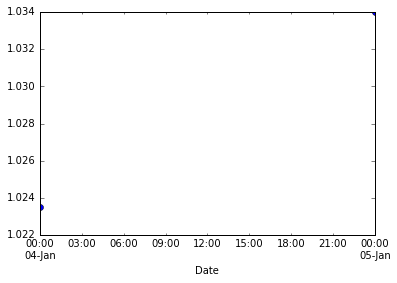

In [443]:
by_hour = sample.resample('H').last()
by_hour.plot(marker='o')

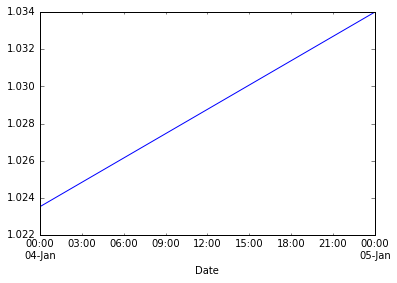

In [435]:
by_hour.interpolate().plot()